<a href="https://colab.research.google.com/github/wellingtonsouza32/ChallengeAlura/blob/main/challenge_semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**ALURA VOZ**


- Solicitação da área de Vendas da Empresa
  - Reduzir taxa de Evasão de Clientes (Churn Rate)

- Sugestão de análise
  - Identificar Cliente que tenham maior chance de deixar a empresa
  - Investigar caracteristicas de clientes
  - Investigar planos de Clientes
  - Classificar as pessoas "Deixará a empresa" ou "Não Deixará a empresa"

- Plano de Ação
  - Trabalhar conjunto de dados (explorar, tratar e modelar)
  - Otimizar cada modelo
  - O Modelos deve apoiar na toma de decisão
  - Publicar os avanços no GitHub


#Dicionário de dados
- customerID: número de identificação único de cada cliente
- Churn: se o cliente deixou ou não a empresa
- gender: gênero (masculino e feminino)
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Partner: se o cliente possui ou não um parceiro ou parceira
- Dependents: se o cliente possui ou não dependentes
- tenure: meses de contrato do cliente
- PhoneService: assinatura de serviço telefônico
- MultipleLines: assisnatura de mais de uma linha de telefone
- InternetService: assinatura de um provedor internet
- OnlineSecurity: assinatura adicional de segurança online
- OnlineBackup: assinatura adicional de backup online
- DeviceProtection: assinatura adicional de proteção no dispositivo
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
- StreamingTV: assinatura de TV a cabo
- StreamingMovies: assinatura de streaming de filmes
- Contract: tipo de contrato
- PaperlessBilling: se o cliente prefere receber online a fatura
- PaymentMethod: forma de pagamento
- Charges.Monthly: total de todos os serviços do cliente por mês
- Charges.Total: total gasto pelo cliente

In [92]:
import pandas as pd
from matplotlib import pyplot as plt

#Importando o Json com o dataset proposto



In [93]:
dados = pd.read_json(
    path_or_buf='/content/drive/MyDrive/challenge_semana1/challenge_1.json',
    orient = 'columns'
)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Tratando Inconsistências

###Tratando a coluna customer para torná-la um Dataframe

In [94]:
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


#Tratando a coluna Phone para torná-la um Dataframe

In [95]:
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone.head(5)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


##Tratando a coluna Internet para torná-la um Dataframe

In [96]:
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet.head(5)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


#Tratando a coluna Account para torná-la um Dataframe

In [97]:
dados_account = pd.json_normalize(data=dados.account)
dados_account.head(5)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


#Concatenando Lateralmente as Colunas

In [98]:
df_aluravoz = pd.concat([dados.customerID, dados.Churn,dados_customer,dados_phone,dados_internet,dados_account], axis=1)
df_aluravoz

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#Analisando as colunas para tradução e melhor entendimento

In [99]:
df_aluravoz.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#Tradução das colunas para compreensão mais clara

In [100]:
df_aluravoz.rename(columns={'customerID': 'Codigo_Cliente',
'Churn': 'Evasao',
'gender': 'Genero',
'SeniorCitizen': 'Idoso',
'Partner': 'Possui_Parceiro',
'Dependents': 'Possui_Dependentes',
'tenure': 'Meses_Contrato',
'PhoneService': 'Assinatura_Telefonica',
'MultipleLines': 'Multiplas_Linhas',
'InternetService': 'Assinatura_Internet',
'OnlineSecurity': 'Assinatura_Segurança',
'OnlineBackup': 'Assinatura_Backup_Online',
'DeviceProtection': 'Assinatura_Protecao_Dispositivo',
'TechSupport': 'Assinatura_Suporte_Tecnico',
'StreamingTV': 'Assinatura_Tv_Cabo',
'StreamingMovies': 'Streaming_Filmes',
'Contract': 'Tipo_Contrato',
'PaperlessBilling': 'Fatura_Online',
'PaymentMethod': 'Forma_Pagamento',
'Charges.Monthly': 'Total_Servicos_Mensal',
'Charges.Total': 'Total_Gasto_Cliente'}, inplace = True)

#Verificando os tipos de dados de cada Coluna.

In [101]:
df_aluravoz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Codigo_Cliente                   7267 non-null   object 
 1   Evasao                           7267 non-null   object 
 2   Genero                           7267 non-null   object 
 3   Idoso                            7267 non-null   int64  
 4   Possui_Parceiro                  7267 non-null   object 
 5   Possui_Dependentes               7267 non-null   object 
 6   Meses_Contrato                   7267 non-null   int64  
 7   Assinatura_Telefonica            7267 non-null   object 
 8   Multiplas_Linhas                 7267 non-null   object 
 9   Assinatura_Internet              7267 non-null   object 
 10  Assinatura_Segurança             7267 non-null   object 
 11  Assinatura_Backup_Online         7267 non-null   object 
 12  Assinatura_Protecao_

#Avaliando se existe algum dado nulo nas colunas

In [102]:
df_aluravoz.isnull().sum()
#Este resultado foi melhor tratado em relação à coluna Evasao mais a frente.

Codigo_Cliente                     0
Evasao                             0
Genero                             0
Idoso                              0
Possui_Parceiro                    0
Possui_Dependentes                 0
Meses_Contrato                     0
Assinatura_Telefonica              0
Multiplas_Linhas                   0
Assinatura_Internet                0
Assinatura_Segurança               0
Assinatura_Backup_Online           0
Assinatura_Protecao_Dispositivo    0
Assinatura_Suporte_Tecnico         0
Assinatura_Tv_Cabo                 0
Streaming_Filmes                   0
Tipo_Contrato                      0
Fatura_Online                      0
Forma_Pagamento                    0
Total_Servicos_Mensal              0
Total_Gasto_Cliente                0
dtype: int64

#Atribuindo valor '0' para as linhas vazias da coluna 'Total_Gasto_Cliente'

In [103]:
#              [        filtro                            ,   Coluna            ]  Novo valor
df_aluravoz.loc[df_aluravoz['Total_Gasto_Cliente'] == " ", 'Total_Gasto_Cliente'] = '0'                
df_aluravoz[df_aluravoz['Total_Gasto_Cliente'] == '0'] #consulta com filtro no valor atualizado


,Codigo_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Assinatura_Telefonica,Multiplas_Linhas,Assinatura_Internet,Assinatura_Segurança,Assinatura_Backup_Online,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tecnico,Assinatura_Tv_Cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Servicos_Mensal,Total_Gasto_Cliente
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0


#Convertendo a coluna Total_Gasto_Cliente para tipo Float64

In [104]:
pd.to_numeric(df_aluravoz['Total_Gasto_Cliente'])


0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7262     742.90
7263    1873.70
7264      92.75
7265    4627.65
7266    3707.60
Name: Total_Gasto_Cliente, Length: 7267, dtype: float64

#Substituindo, por segurança, os valores 0 com a mediana

In [105]:
df_aluravoz['Total_Gasto_Cliente'].median()

1389.2

In [106]:
df_aluravoz.loc[df_aluravoz['Total_Gasto_Cliente'] == '0', 'Total_Gasto_Cliente'] = '1389.2'
df_aluravoz['Total_Gasto_Cliente'] = pd.to_numeric(df_aluravoz['Total_Gasto_Cliente'])



In [107]:
df_aluravoz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Codigo_Cliente                   7267 non-null   object 
 1   Evasao                           7267 non-null   object 
 2   Genero                           7267 non-null   object 
 3   Idoso                            7267 non-null   int64  
 4   Possui_Parceiro                  7267 non-null   object 
 5   Possui_Dependentes               7267 non-null   object 
 6   Meses_Contrato                   7267 non-null   int64  
 7   Assinatura_Telefonica            7267 non-null   object 
 8   Multiplas_Linhas                 7267 non-null   object 
 9   Assinatura_Internet              7267 non-null   object 
 10  Assinatura_Segurança             7267 non-null   object 
 11  Assinatura_Backup_Online         7267 non-null   object 
 12  Assinatura_Protecao_

#Descrição das colunas

In [108]:
df_aluravoz.describe()

,Idoso,Meses_Contrato,Total_Servicos_Mensal,Total_Gasto_Cliente
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2279.284856
std,0.369074,24.571773,30.129572,2267.180032
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,401.400000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


#Validando se o Id é uma chave única

In [109]:
print (len(pd.unique(df_aluravoz.Codigo_Cliente)))
df_aluravoz['Codigo_Cliente']
#Comparativo do print com o Length da coluna, desta forma podemos abstrair que todas as linhas possuem um código único

7267


0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7262    9987-LUTYD
7263    9992-RRAMN
7264    9992-UJOEL
7265    9993-LHIEB
7266    9995-HOTOH
Name: Codigo_Cliente, Length: 7267, dtype: object

#Validando as chaves únicas das demais Colunas

In [110]:
pd.unique(df_aluravoz.columns)
#obtendo o Array das colunas para uso na montagem do For

array(['Codigo_Cliente', 'Evasao', 'Genero', 'Idoso', 'Possui_Parceiro',
       'Possui_Dependentes', 'Meses_Contrato', 'Assinatura_Telefonica',
       'Multiplas_Linhas', 'Assinatura_Internet', 'Assinatura_Segurança',
       'Assinatura_Backup_Online', 'Assinatura_Protecao_Dispositivo',
       'Assinatura_Suporte_Tecnico', 'Assinatura_Tv_Cabo',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online',
       'Forma_Pagamento', 'Total_Servicos_Mensal', 'Total_Gasto_Cliente'],
      dtype=object)

In [111]:
unique_columns = {}
for unique in ['Evasao', 'Genero', 'Idoso', 'Possui_Parceiro','Possui_Dependentes', 'Meses_Contrato', 'Assinatura_Telefonica','Multiplas_Linhas', 'Assinatura_Internet', 'Assinatura_Segurança','Assinatura_Backup_Online', 'Assinatura_Protecao_Dispositivo','Assinatura_Suporte_Tecnico', 'Assinatura_Tv_Cabo','Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online','Forma_Pagamento']:
  unique_columns = pd.unique(df_aluravoz[unique])
  print(f"A Coluna é \033[1m{unique}\033[0m e os dados únicos são \033[1m{unique_columns}\033[0m")


A Coluna é Evasao e os dados únicos são ['No' 'Yes' '']
A Coluna é Genero e os dados únicos são ['Female' 'Male']
A Coluna é Idoso e os dados únicos são [0 1]
A Coluna é Possui_Parceiro e os dados únicos são ['Yes' 'No']
A Coluna é Possui_Dependentes e os dados únicos são ['Yes' 'No']
A Coluna é Meses_Contrato e os dados únicos são [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
A Coluna é Assinatura_Telefonica e os dados únicos são ['Yes' 'No']
A Coluna é Multiplas_Linhas e os dados únicos são ['No' 'Yes' 'No phone service']
A Coluna é Assinatura_Internet e os dados únicos são ['DSL' 'Fiber optic' 'No']
A Coluna é Assinatura_Segurança e os dados únicos são ['No' 'Yes' 'No internet service']
A Coluna é Assinatura_Backup_Online e os dados únicos são ['Yes' 'No' 'No internet service']
A Coluna é Assinatura_Protecao

#Tratando dados inconsistente da coluna Evasão

In [23]:
#efetuado um filtro e efetuada a deleção pelo indice, atualizando o dataframe com essa informação.
evasao_vazio = df_aluravoz[df_aluravoz.Evasao == '']
df_aluravoz.drop(evasao_vazio.index,inplace=True)
pd.unique(df_aluravoz['Evasao'])


array(['No', 'Yes'], dtype=object)

#Tratamento Coluna Idoso

In [119]:
idoso = df_aluravoz['Idoso'].apply(lambda x:'Menor que 65 Anos' if x == 0 else
                                                      'Maior que 65 Anos')

idoso


0       Menor que 65 Anos
1       Menor que 65 Anos
2       Menor que 65 Anos
3       Maior que 65 Anos
4       Maior que 65 Anos
              ...        
7262    Menor que 65 Anos
7263    Menor que 65 Anos
7264    Menor que 65 Anos
7265    Menor que 65 Anos
7266    Menor que 65 Anos
Name: Idoso, Length: 7267, dtype: object

#Separando e Analisando somente os clientes que apresentaram Churn Rate

In [114]:
evasao_clientes = df_aluravoz[df_aluravoz.Evasao == 'Yes']
evasao_clientes.head(2)

,Codigo_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Assinatura_Telefonica,Multiplas_Linhas,Assinatura_Internet,Assinatura_Segurança,Assinatura_Backup_Online,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tecnico,Assinatura_Tv_Cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Servicos_Mensal,Total_Gasto_Cliente
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85


O Intuíto das avaliações a Seguir é de identificar o perfil do cliente que tem mais propensão a cancelar nossos serviços.
Avaliando o Gráfico percebemos que a desistência dos serviços entre os Gêneros estão equilibrados, o que não indica que devemos fazer campanhas para um Gênero especifico.

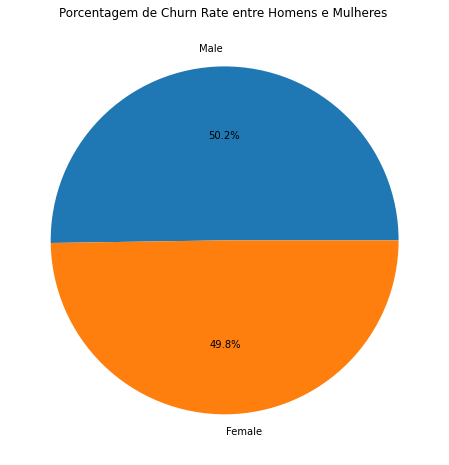

In [78]:
fig = plt.figure(figsize =(20, 8))
porcentagemSexo = evasao_clientes['Genero'].value_counts(normalize=True)
rotulo = evasao_clientes['Genero'].unique()
plt.pie(porcentagemSexo, labels = rotulo, autopct='%1.1f%%')
plt.title('Porcentagem de Churn Rate entre Homens e Mulheres ')
plt.show()


Pelo Gráfico abaixo fica evidente que o maior número de desistências está preponderantemente alocado no grupo que possuí menos de 65 anos.

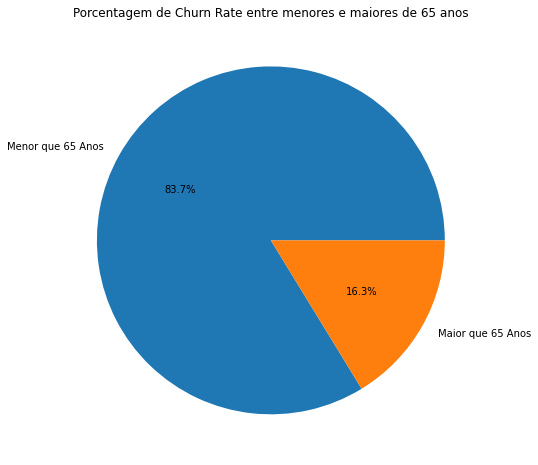

In [146]:
fig = plt.figure(figsize =(20, 8))
porcentagemIdoso = idoso.value_counts(normalize=True)
rotulo = idoso.unique()
plt.pie(porcentagemIdoso, labels = rotulo, autopct='%1.1f%%')
plt.title('Porcentagem de Churn Rate entre menores e maiores de 65 anos')
plt.show()

In [145]:
parceiro = df_aluravoz['Possui_Parceiro'].apply(lambda x:'Sim' if x == 'Yes' else
                                                      'Não')
relac_idoso_parceiro = pd.concat([parceiro, idoso], axis=1)
relac_idoso_parceiro


# relac_idoso_parceiro = relac_idoso_parceiro['Idoso'] == 'Maior que 65 Anos'
# relac_idoso_parceiro

,Possui_Parceiro,Idoso
0,Sim,Menor que 65 Anos
1,Não,Menor que 65 Anos
2,Não,Menor que 65 Anos
3,Sim,Maior que 65 Anos
4,Sim,Maior que 65 Anos
...,...,...
7262,Não,Menor que 65 Anos
7263,Sim,Menor que 65 Anos
7264,Não,Menor que 65 Anos
7265,Sim,Menor que 65 Anos


In [ ]:
# frequencia = pd.crosstab(idoso,parceiro)
# frequencia

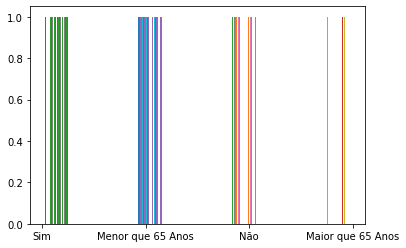

In [132]:
plt.hist(relac_idoso_parceiro)
plt.show()

Possui_Parceiro,Não,Sim
Idoso,,
Maior que 65 Anos,579,603
Menor que 65 Anos,3170,2915


Como adicionar uma coluna no Pandas?
insert() Método para adicionar uma nova coluna em Pandas. Você pode utilizar a função df. insert() se quiser adicionar a nova coluna em um índice específico.1 de nov. de 2020